In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# output metadata
_local_store_path = "/pscratch/sd/n/nagarwal/cp1/"
_expt = "R0"
_inference_dir = os.path.join(_local_store_path, _expt,
                              "inference", "validation")
_postprocessed_inference_dir = os.path.join(_inference_dir,
                                            "postprocessed_inference_35252102")

In [16]:
# GraphUFS predictions
fname = "graphufs.240h.zarr"
ds_pred = xr.open_zarr(os.path.join(_inference_dir, fname))
ds_pred

<xarray.Dataset> Size: 803GB
Dimensions:    (time: 512, lead_time: 40, lat: 192, lon: 384, level: 16, z_l: 10)
Coordinates:
  * lat        (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lead_time  (lead_time) timedelta64[ns] 320B 0 days 06:00:00 ... 10 days 0...
  * level      (level) float64 128B 226.1 676.2 773.6 ... 825.8 922.6 572.7
  * lon        (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time       (time) datetime64[ns] 4kB 2022-01-01T06:00:00 ... 2023-10-02
  * z_l        (z_l) float64 80B 0.5154 2.765 7.648 15.95 ... 152.1 271.2 417.7
Data variables: (12/22)
    LW         (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    SSH        (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    SW         (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    dzdt       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    icec       (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    icetk      (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    ...         ...
    ugrd       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    ugrd10m    (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    uo         (time, lead_time, z_l, lat, lon) float32 60GB dask.array<chunksize=(1, 40, 10, 192, 384), meta=np.ndarray>
    vgrd       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    vgrd10m    (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    vo         (time, lead_time, z_l, lat, lon) float32 60GB dask.array<chunksize=(1, 40, 10, 192, 384), meta=np.ndarray>

In [17]:
# Replay targets
fname = "replay.240h.zarr"
ds_tar = xr.open_zarr(os.path.join(_inference_dir, fname))
ds_tar

<xarray.Dataset> Size: 1TB
Dimensions:    (time: 512, lead_time: 40, lat: 192, lon: 384, level: 16, z_l: 10)
Coordinates:
  * lat        (lat) float64 2kB 89.82 88.89 87.95 ... -87.25 -88.18 -89.12
  * lead_time  (lead_time) timedelta64[ns] 320B 0 days 06:00:00 ... 10 days 0...
  * level      (level) float64 128B 226.1 676.2 773.6 ... 825.8 922.6 572.7
  * lon        (lon) float64 3kB 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
  * time       (time) datetime64[ns] 4kB 2022-01-01T06:00:00 ... 2023-10-02
  * z_l        (z_l) float64 80B 0.5154 2.765 7.648 15.95 ... 152.1 271.2 417.7
Data variables: (12/22)
    LW         (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    SSH        (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    SW         (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    dzdt       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    icec       (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    icetk      (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    ...         ...
    ugrd       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    ugrd10m    (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    uo         (time, z_l, lead_time, lat, lon) float64 121GB dask.array<chunksize=(1, 10, 40, 192, 384), meta=np.ndarray>
    vgrd       (time, lead_time, level, lat, lon) float32 97GB dask.array<chunksize=(1, 40, 16, 192, 384), meta=np.ndarray>
    vgrd10m    (time, lead_time, lat, lon) float32 6GB dask.array<chunksize=(1, 40, 192, 384), meta=np.ndarray>
    vo         (time, z_l, lead_time, lat, lon) float64 121GB dask.array<chunksize=(1, 10, 40, 192, 384), meta=np.ndarray>

### SSH

In [28]:
itime = np.random.randint(0, ds_pred.sizes["time"]) # randomly select an initialization time
ileadtime = -1
leadtime = ds_pred.lead_time[ileadtime].values/3600/1e9

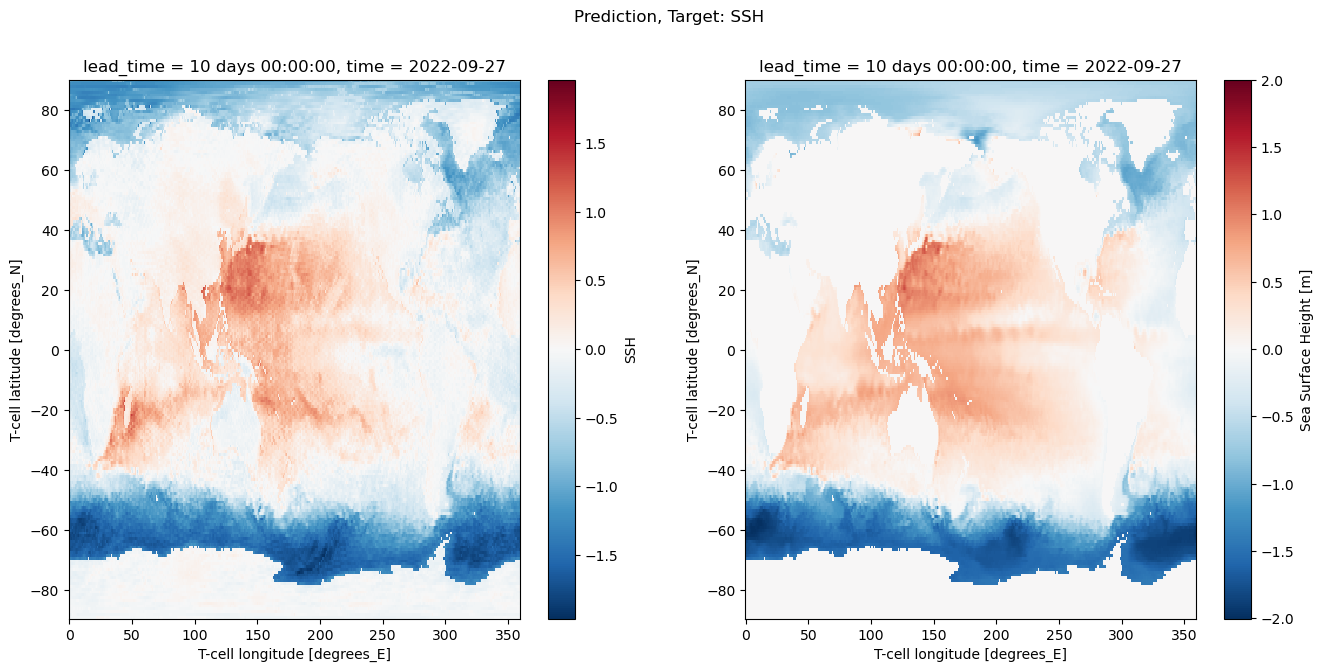

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(16,7))
ds_pred.SSH.isel(time=itime, lead_time=ileadtime,).plot(ax=ax[0])
ds_tar.SSH.isel(time=itime, lead_time=ileadtime,).plot(ax=ax[1])
plt.suptitle(f"Prediction, Target: SSH")
plt.show()

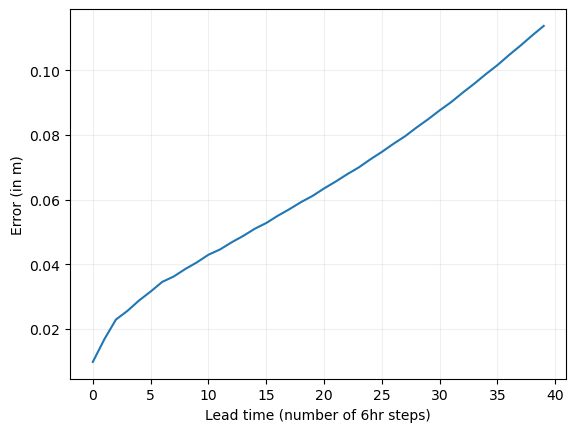

In [33]:
ssh_rmse = np.sqrt((ds_tar.SSH - ds_pred.SSH)**2)
plt.plot(ssh_rmse.mean(dim=('time','lat', 'lon')))
plt.ylabel('Error (in m)')
plt.xlabel('Lead time (number of 6hr steps)')
plt.grid(alpha=0.2)
plt.show()

### Temp

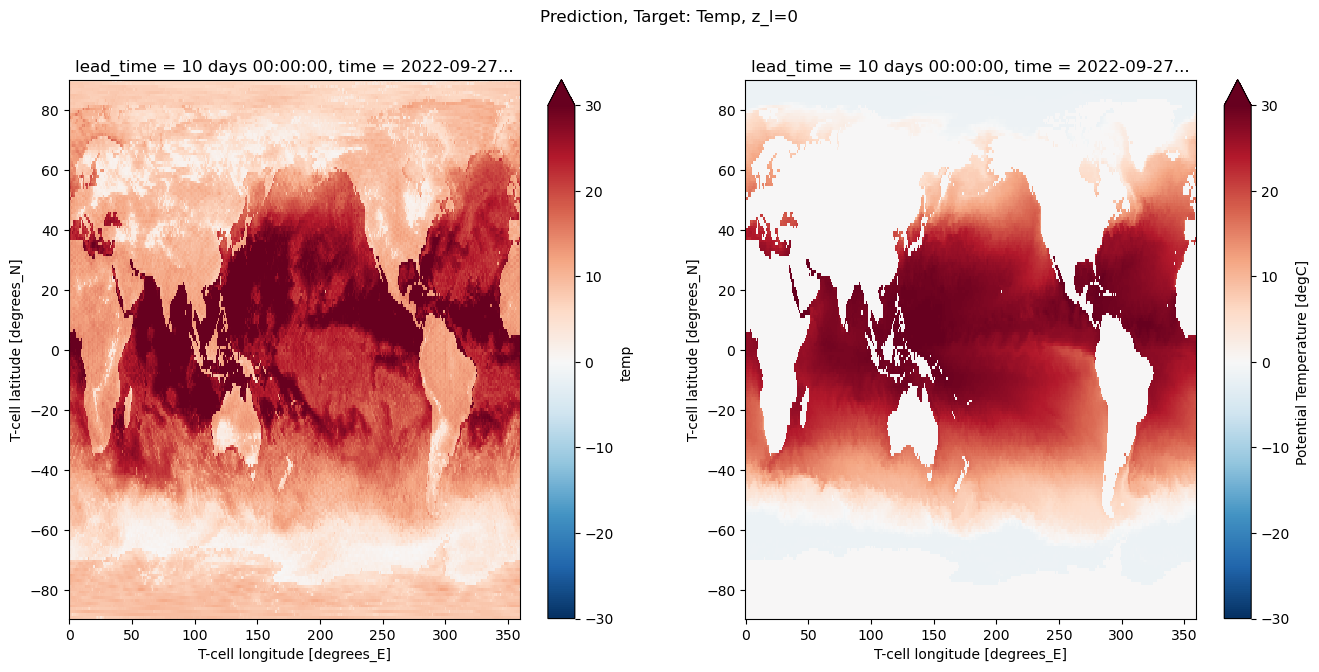

In [45]:
depth = 0
fig, ax = plt.subplots(1,2, figsize=(16,7))
ds_pred.temp.isel(time=itime, lead_time=ileadtime).sel(z_l=depth, method='nearest').plot(ax=ax[0], vmin=-30, vmax=30, cmap="RdBu_r")
ds_tar.temp.isel(time=itime, lead_time=ileadtime).sel(z_l=depth, method='nearest').plot(ax=ax[1], vmin=-30, vmax=30, cmap="RdBu_r")
plt.suptitle(f'Prediction, Target: Temp, z_l={depth}')
plt.show()

### Ice Concentration 

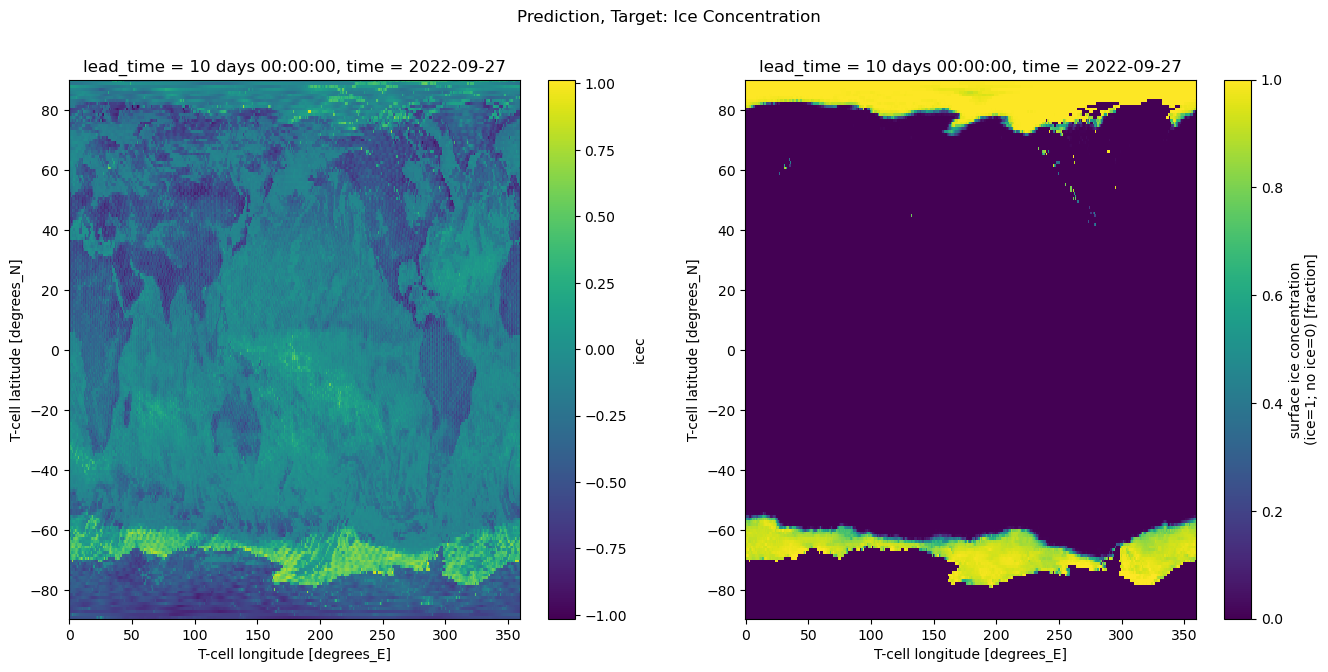

In [51]:
fig, ax = plt.subplots(1,2, figsize=(16,7))
kwargs = {"cmap":"viridis",}
ds_pred.icec.isel(time=itime, lead_time=ileadtime).plot(ax=ax[0], **kwargs)
ds_tar.icec.isel(time=itime, lead_time=ileadtime).plot(ax=ax[1], **kwargs)
plt.suptitle(f'Prediction, Target: Ice Concentration')
plt.show()

### Ice Thickness

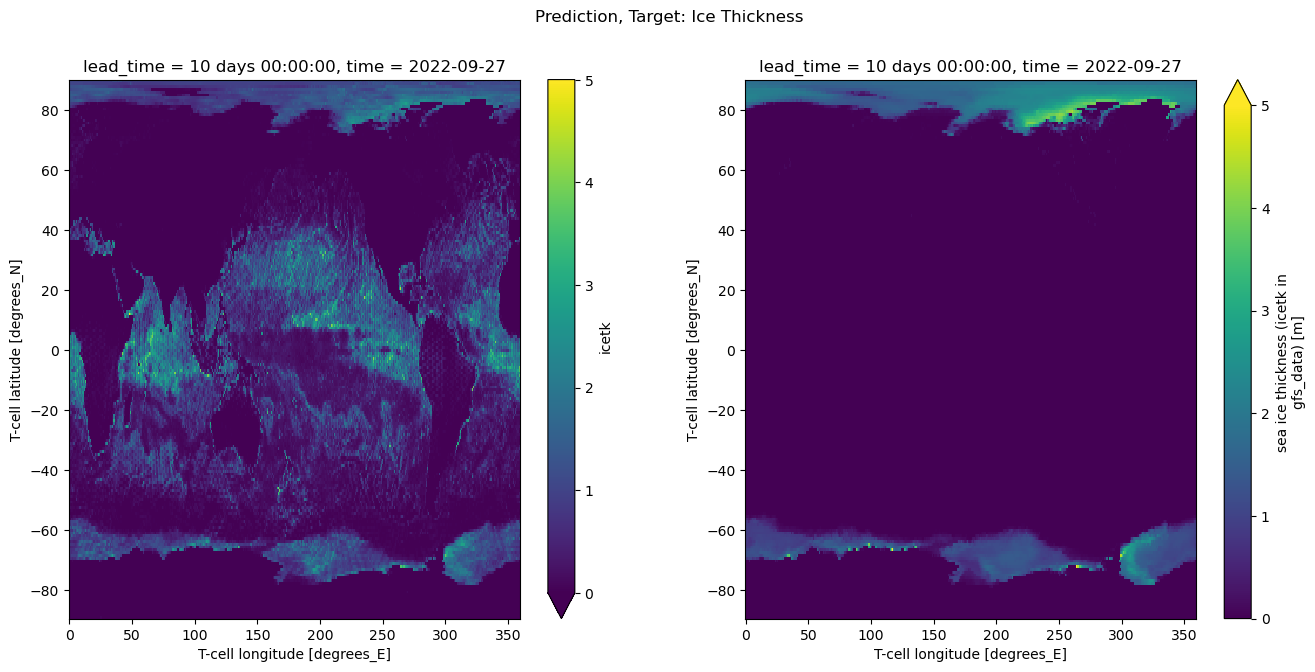

In [55]:
fig, ax = plt.subplots(1,2, figsize=(16,7))
kwargs = {"cmap":"viridis", "vmin":0, "vmax":5}
ds_pred.icetk.isel(time=itime, lead_time=ileadtime).plot(ax=ax[0], **kwargs)
ds_tar.icetk.isel(time=itime, lead_time=ileadtime).plot(ax=ax[1], **kwargs)
plt.suptitle(f'Prediction, Target: Ice Thickness')
plt.show()

### Land Variable

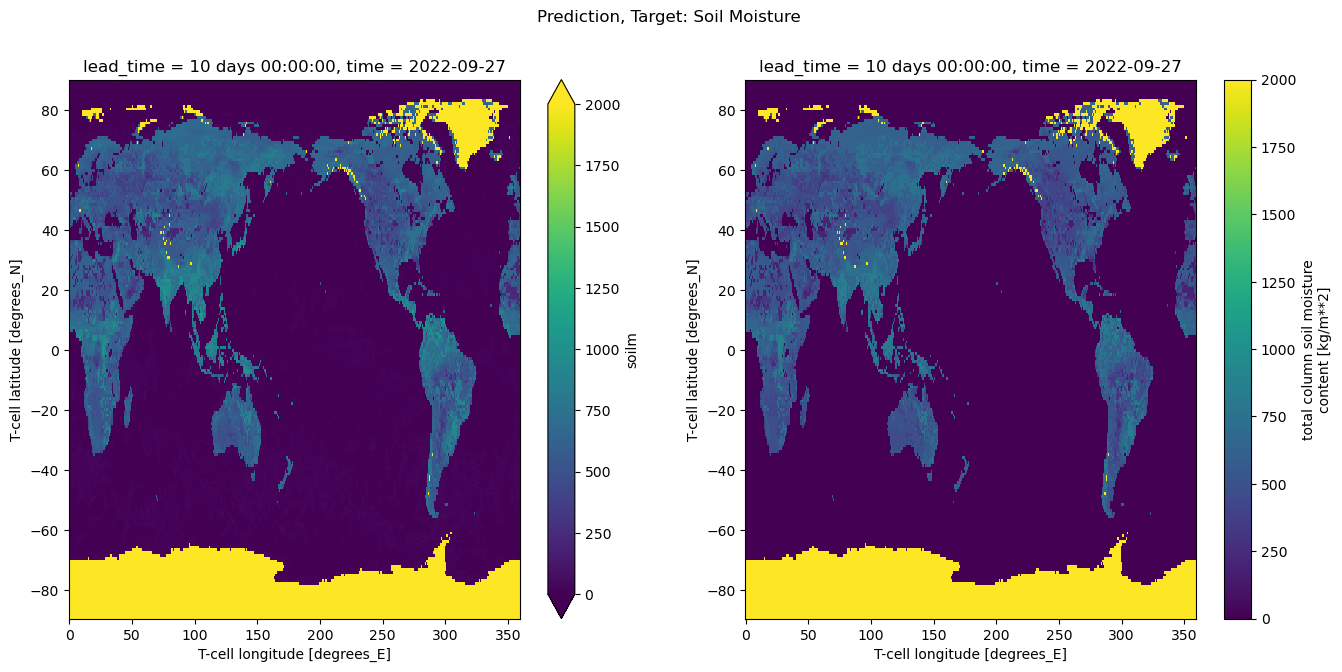

In [58]:
fig, ax = plt.subplots(1,2, figsize=(16,7))
kwargs = {"cmap":"viridis", "vmin":0, "vmax":2000}
ds_pred.soilm.isel(time=itime, lead_time=ileadtime).plot(ax=ax[0], **kwargs)
ds_tar.soilm.isel(time=itime, lead_time=ileadtime).plot(ax=ax[1], **kwargs)
plt.suptitle(f'Prediction, Target: Soil Moisture')
plt.show()

### Local plots

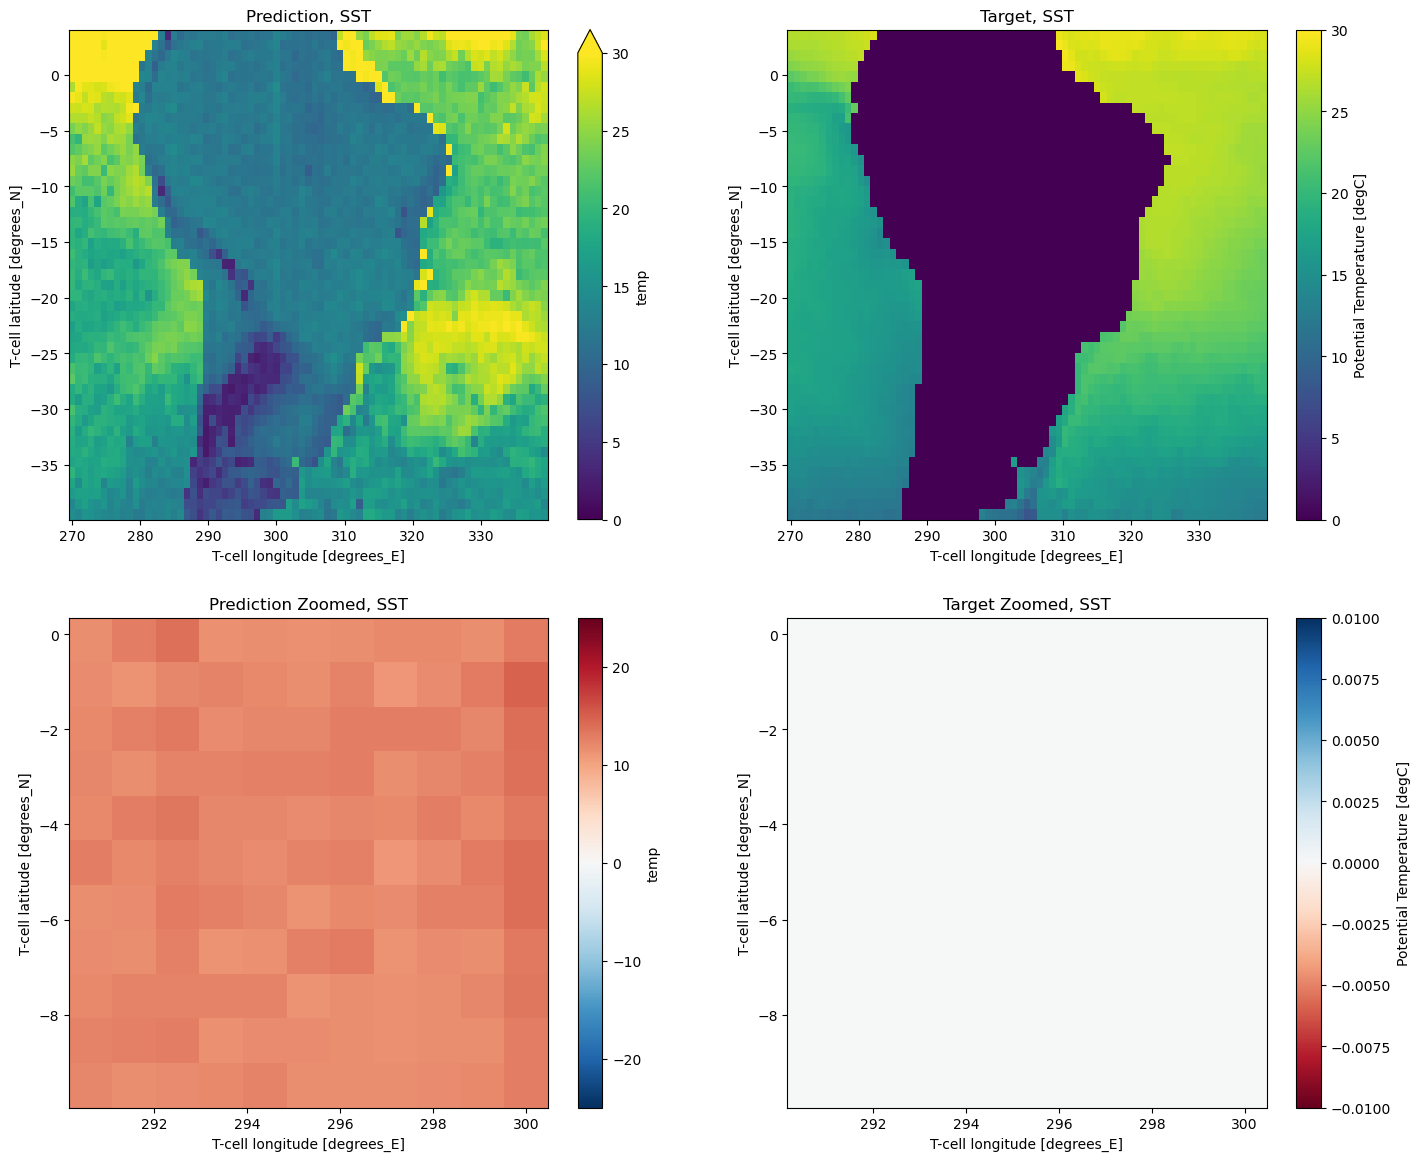

In [65]:
depth = 0 # Surface

fig, ax = plt.subplots(2, 2, figsize=(17,14))

# Prediction
pred_temp = ds_pred.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
pred_temp_zoom = ds_pred.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
pred_temp.plot(ax=ax[0,0], vmin=0, vmax=30); ax[0,0].set_title("Prediction, SST")
pred_temp_zoom.plot(ax=ax[1,0], vmin=-25, vmax=25, cmap='RdBu_r'); ax[1,0].set_title("Prediction Zoomed, SST")

# Target
tar_temp = ds_tar.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(4,-40), lon=slice(270,340)).sel(z_l=depth, method='nearest')
tar_temp_zoom = ds_tar.temp.isel(time=itime, lead_time=ileadtime).sel(lat=slice(0,-10), lon=slice(290,300)).sel(z_l=depth, method='nearest')
tar_temp.plot(ax=ax[0,1], vmin=0, vmax=30); ax[0,1].set_title("Target, SST")
tar_temp_zoom.plot(ax=ax[1,1], vmin=-0.01, vmax=0.01, cmap='RdBu'); ax[1,1].set_title("Target Zoomed, SST")
#plt.savefig("Input_Prediction_Target_SST_Local.png", dpi=300)
plt.show()